In [1]:
import csv

def load_csv_to_list(filename):
    data_list = []
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            # Assuming each row has the format: [prompt, reply_base, reply_watermark]
            if len(row) == 3:  # Making sure the row has exactly 3 elements
                data_list.append(row)
    return data_list

# Example usage
filename = 'output_gen6.csv'
results = load_csv_to_list(filename)

for res in results: 
    print(f'''"{res[0]}",''')

"What is the capital of France?",
"Explain the process of photosynthesis.",
"What are the basic rules of chess?",
"Describe the water cycle.",
"Summarize the plot of 'Romeo and Juliet'.",
"What is Newton's first law of motion?",
"How do you make a simple omelette?",
"List the seven continents.",
"What are the primary colors?",
"Explain the concept of supply and demand in economics.",
"What is the function of the heart in the human body?",
"How does a compass work?",
"Define the term 'ecosystem'.",
"What is the boiling point of water?",
"Describe how a computer works.",
"What are the planets in our solar system?",
"Explain the basics of HTML.",
"Who was Albert Einstein?",
"What is the Pythagorean theorem?",
"How do you calculate the area of a circle?",
"What is photosynthesis?",
"Describe the life cycle of a butterfly.",
"What is the Declaration of Independence?",
"How do you change a flat tire?",
"What is the process of evaporation?",
"Explain the rules of soccer.",
"What is the signif

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import math

# Load the model and tokenizer
model_name = "facebook/opt-2.7b"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)




In [2]:
import time
from pathlib import Path
import textwrap

import numpy as np
import torch
import transformers
from transformers import (AutoConfig, AutoModelForCausalLM, AutoTokenizer,
                          BitsAndBytesConfig)


from modules.GPTQ_loader import load_quantized
from modules.text_generation import generate_reply
import modules.shared as shared
from modules.model import load_model

import hashlib
import spacy

shared.model_name = "_Mistral-7b-gptq-4bit-32g-actorder_True"
shared.act_order = True

print(f"Loading {shared.model_name}...")
t0 = time.time()

shared.groupsize = 128
shared.wbits = 4
shared.model, shared.tokenizer = load_model(shared.model_name, gptq = True, awq=False)

print(f"Loaded the model in {(time.time()-t0):.2f} seconds.")


import pandas as pd
df = pd.read_csv('Lancaster_sensorimotor_norms_for_39707_words.csv', header=0)  #the header is in the first row

shared.sensorimotor = df.set_index('Word').T.to_dict('dict')
shared.classes = ['Auditory.mean', 'Gustatory.mean','Haptic.mean','Interoceptive.mean','Olfactory.mean','Visual.mean','Foot_leg.mean','Hand_arm.mean','Head.mean','Mouth.mean','Torso.mean']




CUDA extension not installed.
Loading _Mistral-7b-gptq-4bit-32g-actorder_True...
Loading _Mistral-7b-gptq-4bit-32g-actorder_True...


INFO - `checkpoint_format` is missing from the quantization configuration and is automatically inferred to gptq.


Auto-assiging --gpu-memory 23 for your GPU to try to prevent out-of-memory errors. You can manually set other values.
The AutoGPTQ params are: {'model_basename': 'model', 'device': 'cuda:0', 'use_triton': False, 'inject_fused_attention': False, 'inject_fused_mlp': False, 'use_safetensors': True, 'trust_remote_code': True, 'max_memory': {0: '23GiB', 'cpu': '64GiB'}, 'quantize_config': None}


INFO - The layer lm_head is not quantized.
Some weights of the model checkpoint at models/_Mistral-7b-gptq-4bit-32g-actorder_True/model.safetensors were not used when initializing MistralForCausalLM: {'model.layers.20.self_attn.v_proj.bias', 'model.layers.18.mlp.down_proj.bias', 'model.layers.13.self_attn.k_proj.bias', 'model.layers.22.mlp.down_proj.bias', 'model.layers.30.self_attn.q_proj.bias', 'model.layers.18.self_attn.v_proj.bias', 'model.layers.22.mlp.up_proj.bias', 'model.layers.9.self_attn.v_proj.bias', 'model.layers.16.self_attn.q_proj.bias', 'model.layers.24.self_attn.k_proj.bias', 'model.layers.3.mlp.up_proj.bias', 'model.layers.0.mlp.down_proj.bias', 'model.layers.17.mlp.gate_proj.bias', 'model.layers.7.mlp.gate_proj.bias', 'model.layers.26.mlp.down_proj.bias', 'model.layers.4.mlp.up_proj.bias', 'model.layers.9.self_attn.k_proj.bias', 'model.layers.7.self_attn.q_proj.bias', 'model.layers.15.self_attn.v_proj.bias', 'model.layers.16.self_attn.k_proj.bias', 'model.layers.27.se

Loaded the model in 7.11 seconds.

Loaded the model in 7.11 seconds.


In [3]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer


# Ensure the model is in evaluation mode
shared.model.eval()

# Function to calculate perplexity
def calculate_perplexity(model, tokenizer, text):
    # Tokenize the input text
    input_ids = tokenizer.encode(text, return_tensors='pt').to('cuda:0')
    
    # Get model output (logits)
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
    
    # Calculate the loss
    loss = outputs.loss.item()
    
    # Calculate perplexity
    perplexity = torch.exp(torch.tensor(loss))
    
    return perplexity.item()

# Prompt for the model to generate a response
prompt = "What is the capital of France?"
generated_text = "The capital of France is Paris."


# Calculate perplexity of the generated response
perplexity = calculate_perplexity(shared.model, shared.tokenizer, generated_text)
print(f"Perplexity: {perplexity}")


Perplexity: 23.069236755371094


In [4]:
import csv

def load_csv_to_list(filename):
    data_list = []
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            # Assuming each row has the format: [prompt, reply_base, reply_watermark]
            if len(row) == 3:  # Making sure the row has exactly 3 elements
                data_list.append(row)
    return data_list

# Example usage
filename = 'output_gen6.csv'
results = load_csv_to_list(filename)


# Specify the path to your CSV file
csv_file_path = 'output_genX.csv'

# Load the CSV file
with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    results_kb = [row for row in csvreader]


scores = []
for i in range(0,len(results)): 
    base = calculate_perplexity(shared.model, shared.tokenizer, results[i][1])
    watermark = calculate_perplexity(shared.model, shared.tokenizer, results[i][2])
    kb = calculate_perplexity(shared.model, shared.tokenizer, results_kb[i][2])
    scores.append([base,watermark,kb])

In [5]:
import csv

# Specify the file name
file_name = "perplexity_gen6.csv"

# Open the file in write mode with newline='' to ensure correct line endings
with open(file_name, 'w', newline='') as csv_file:
    # Create a CSV writer object
    csv_writer = csv.writer(csv_file)

    # Write the data to the CSV file
    csv_writer.writerows(scores)

In [20]:
difference = 0

for score in scores:
    difference += score[0] - score[1]

average = difference / len(scores)

print(average)


import numpy as np

def calculate_differences(pairs):
    """
    Calculate the differences between pairs of values in a list.
    Args:
    pairs (list of tuple): List of (value1, value2) pairs.

    Returns:
    list of float: List of differences.
    """
    return [value2 - value1 for value1, value2, value3 in pairs]

def calculate_differencesKB(pairs):
    """
    Calculate the differences between pairs of values in a list.
    Args:
    pairs (list of tuple): List of (value1, value2) pairs.

    Returns:
    list of float: List of differences.
    """
    return [value3 - value1 for value1, value2, value3 in pairs]

def exclude_outliers(data, m=2):
    """
    Exclude outliers from the data using the modified z-score method.
    Args:
    data (list of float): List of data points.
    m (float): Modified z-score threshold for identifying outliers.

    Returns:
    list of float: List of data points without outliers.
    """
    data = np.array(data)
    median = np.median(data)
    diff = np.abs(data - median)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation

    return data[modified_z_score < m].tolist()

# Example list of pairs
pairs = [(10, 20), (15, 30), (20, 40), (100, 150), (25, 60), (30, 35)]

# Calculate differences
differences = calculate_differences(scores)
# Exclude outliers
filtered_differences = exclude_outliers(differences)

differencesKB = calculate_differencesKB(scores)
filtered_differencesKB = exclude_outliers(differencesKB)

print("Original Differences:", differences)
print("Original Average:", sum(differences)/len(differences))
print("Filtered Differences:", filtered_differences)
print("Filtered Average:", sum(filtered_differences)/len(filtered_differences))

print("Original Differences KB:", differencesKB)
print("Original Average KB:", sum(differencesKB)/len(differencesKB))
print("Filtered Differences KB:", filtered_differencesKB)
print("Filtered Average KB:", sum(filtered_differencesKB)/len(filtered_differencesKB))


-9.76228400071462
Original Differences: [54.650503158569336, 0.3490300178527832, 6.998107433319092, -2.9799312353134155, -3.455685615539551, 2.915727376937866, -6.851935386657715, -0.19898414611816406, -0.007549285888671875, 0.0894322395324707, 1053.8227064609528, 3.7262420654296875, 6.85830020904541, 14.750419616699219, 4.473416328430176, -1.0872693061828613, 1.288121223449707, -0.627434492111206, 5.455052971839905, 0.9730110168457031, 4.324052572250366, 17.907270193099976, -1.0359747409820557, 6.940154075622559, -5.8952720165252686, 1.728468894958496, -0.7779145240783691, 1.0739803314208984, 11.35310411453247, 7.245480060577393, -0.41205644607543945, 18.843878030776978, 2.746886730194092, 3.8263840675354004, 0.18123722076416016, -2.8011205196380615, 7.6899402141571045, 2.777108907699585, 1.3328619003295898, 4.996029376983643, -8.36698591709137, 8.90768575668335, 3.5286293029785156, 2.5430984497070312, 6.3427815437316895, 4.944609642028809, 3.3085005283355713, 3.7050230503082275, 34.2

In [21]:
import ast

# Define a function to convert string representations to lists
def convert_to_list(string):
    try:
        return ast.literal_eval(string)
    except (SyntaxError, ValueError):
        return string  # Return the original string if conversion is not possible

# Specify the file name
file_name = "output_score6.csv"
# Open the file in read mode
with open(file_name, 'r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.reader(csv_file)

    # Read the data from the CSV file, convert string representations to lists
    data = [convert_to_list(value) for row in csv_reader for value in row]

# Combine each pair into a single row
scores2 = [(data[i], data[i + 1]) for i in range(0, len(data), 2)]

print(scores2)

[([0.5297548768676754, 0.5297548768676754, 1.0, 1, 0], [0.19113064636803867, 0.19113064636803867, 1.0, 1, 0]), ([0.6050049348103864, 0.654373337490914, 0.9245562130177515, 3, 0], [3.179014954501153e-23, 0.03556596960190672, 8.938361557646732e-22, 21, 17]), ([0.5362103031281812, 0.6031636664179785, 0.8889963586709148, 4, 0], [1.1405077956561046e-07, 0.23488056715276995, 4.855692446086017e-07, 7, 5]), ([0.49501194173685586, 0.5148124194063302, 0.9615384615384615, 2, 0], [4.564181111474285e-30, 0.0034982954143908396, 1.3046871606951035e-27, 20, 19]), ([0.47958544602195813, 0.5187196184173499, 0.9245562130177515, 3, 0], [0.22653737190337375, 0.22653737190337375, 1.0, 1, 0]), ([0.6519375730788235, 0.6519375730788235, 1.0, 1, 0], [1.183606305405905e-07, 0.24375644020863874, 4.855692446086017e-07, 7, 5]), ([0.4450055943886417, 0.5005707729263851, 0.8889963586709148, 4, 0], [2.0606407554447165e-09, 0.09457528793520686, 2.178836354012956e-08, 8, 6]), ([0.6827634596140901, 0.6827634596140901, 1.

In [22]:
import ast

# Define a function to convert string representations to lists
def convert_to_list(string):
    try:
        return ast.literal_eval(string)
    except (SyntaxError, ValueError):
        return string  # Return the original string if conversion is not possible

# Specify the file name
file_name = "output_scoreX.csv"
# Open the file in read mode
with open(file_name, 'r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.reader(csv_file)

    # Read the data from the CSV file, convert string representations to lists
    data = [convert_to_list(value) for row in csv_reader for value in row]

# Combine each pair into a single row
scoresX = [(data[i], data[i + 1]) for i in range(0, len(data), 2)]

print(scoresX[0])

([['p value', '0.872'], 2], [['p value', '2.99e-20'], 9])


[inf, 7.584774076433797, 2.0835622918648005, 2.117705698001356, 1.2265281200366105, -0.7995009431327368, 4.181180133245126, 2.8719093381108256, 0.47049696790494155, 7.916520712471189, 4.0613010240781975, 0.8344987348257403, 3.271972403938282, 3.3340216330032524, 1.436008227944182, 7.53318876887116, 3.4115274355251044, -1.4186537061727384, 4.346067394969176, 3.5796915604435466, 0.6588376927361878, -0.7290027178052185, -0.37723361676181166, 0.493017814484465, 1.2646411356610803, 1.2646411356610803, -1.2107271327915972, 7.6371721053416834, 4.081219609983348, 1.3346222867001936, 7.022454895418073, 3.307895137191807, 0.7688202934580621, 2.545888494446796, 1.0893490279242768, 0.33450303642321233, 1.633328147109815, 0.8523857979575749, -0.5072206605869457, 1.1455050613926967, -0.44821228145660935, 0.6871312867954694, 1.8764027300172408, 0.9423763325979504, 0.7290027178052185, 2.0813705732455117, 1.946455903223, 0.15350506037805695, inf, 6.550355993780327, 3.152281525601164, 3.394317016414164,

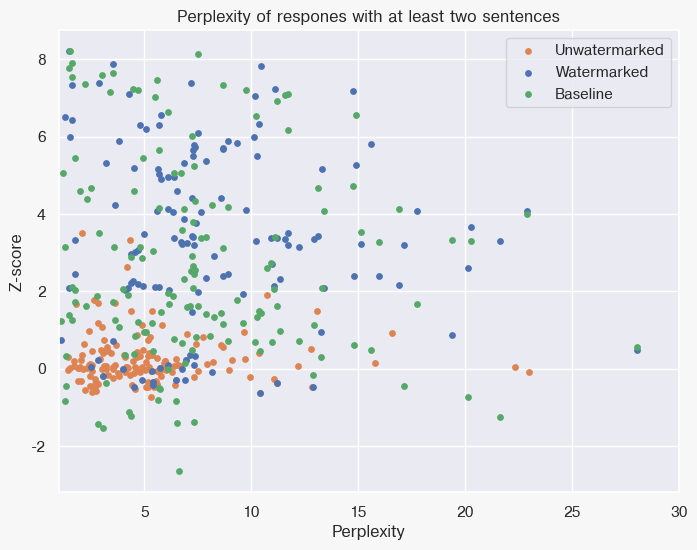

In [23]:
import csv
import ast
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.transforms as mtransforms
import scipy.stats as stats

def probability_to_z(prob):
    return stats.norm.ppf(prob)

# Applying additional aesthetic improvements to the plots
# Set a style for the plots
import seaborn as sns
sns.set_theme()

#plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'Helvetica'

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Setting a light gray background color
fig.patch.set_facecolor('#f7f7f7')

point_cloud_1_y = []
point_cloud_1_x = []
point_cloud_2_y = []
point_cloud_2_x = []
point_cloud_3_y = []
point_cloud_3_x = []
# Define your own data for two point clouds
for i in range(0,len(scores)):
    if(scores2[i][0][3]>0):
        point_cloud_1_y.append(probability_to_z(1.0-scores2[i][0][0]))
        point_cloud_1_x.append(scores[i][0])
        # point_cloud_1_y = [probability_to_z(1.0-item[0][0]) for item in scores2]
        # point_cloud_1_x = [pair[0] for pair in scores]

    if(scoresX[i][1][1]>0):
        point_cloud_3_y.append(probability_to_z(1.0-ast.literal_eval(scoresX[i][1][0][1])))
        point_cloud_3_x.append(scores[i][1])

    if(scores2[i][1][3]>0):
        point_cloud_2_y.append(probability_to_z(1.0-scores2[i][1][0]))
        point_cloud_2_x.append(scores[i][1])
        # point_cloud_2_y = [probability_to_z(1.0-item[1][0]) for item in scores2]
        # point_cloud_2_x = [pair[1] for pair in scores]

    
    # point_cloud_2_y = [probability_to_z(1.0-item[1][0]) for item in scores2]
    # point_cloud_2_x = [pair[1] for pair in scores]

print(point_cloud_3_y)


def plot_with_condition(ax, x_values, y_values, threshold=0.995, colour='C0'):
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    above_threshold = y_values >= threshold
    below_threshold = y_values < threshold

    above_threshold = y_values >= threshold
    below_threshold = y_values < threshold

    # Points above threshold
    ax.scatter(x_values[above_threshold], y_values[above_threshold], s=15, alpha=1, c=colour, marker='x', label='Unwatermarked (>0.995)')
    # Points below threshold
    ax.scatter(x_values[below_threshold], y_values[below_threshold], s=15, alpha=1, c=colour, marker='o', label='Unwatermarked (<0.995)')

def plot_with_condition2(ax, x_values, y_values, threshold=0.995, colour='C0'):
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    above_threshold = y_values >= threshold
    below_threshold = y_values < threshold

    above_threshold = y_values >= threshold
    below_threshold = y_values < threshold

    # Points above threshold
    ax.scatter(x_values[above_threshold], y_values[above_threshold], s=15, alpha=1, c=colour, marker='o', label='Watermarked (>0.995)')
    # Points below threshold
    ax.scatter(x_values[below_threshold], y_values[below_threshold], s=15, alpha=1, c=colour, marker='x', label='Watermarked (<0.995)')
    
# Plot point cloud 1 in blue
ax.scatter(point_cloud_1_x, point_cloud_1_y, s=15, alpha=1, c='C1', marker='o', label='Unwatermarked')
#plot_with_condition(ax, point_cloud_1_x, point_cloud_1_y, 0.995, 'C1')

# Plot point cloud 2 in red
ax.scatter(point_cloud_2_x, point_cloud_2_y, s=15, alpha=1, c='C0', marker='o', label='Watermarked')
#plot_with_condition2(ax, point_cloud_2_x, point_cloud_2_y, 0.995, 'C0')
ax.scatter(point_cloud_3_x, point_cloud_3_y, s=15, alpha=1, c='C2', marker='o', label='Baseline')

# Add labels and legend
ax.set_xlabel('Perplexity',fontsize=12)
ax.set_ylabel('Z-score',fontsize=12)
ax.set_title('Perplexity of respones with at least two sentences')
ax.legend()

ax.set_xlim(1, 30)

# Custom transformation function with strength parameter
class CustomTransform(mtransforms.Transform):
    input_dims = 1
    output_dims = 1
    is_separable = False

    def __init__(self, strength=50):
        mtransforms.Transform.__init__(self)
        self.strength = strength

    def transform_non_affine(self, y):
        y = np.asarray(y)
        return np.where(y < 0.9, y / 1.8, 0.5 + (y - 0.9) ** 2 * self.strength)

    def inverted(self):
        return CustomInverseTransform(self.strength)

class CustomInverseTransform(mtransforms.Transform):
    input_dims = 1
    output_dims = 1
    is_separable = False

    def __init__(self, strength=50):
        mtransforms.Transform.__init__(self)
        self.strength = strength

    def transform_non_affine(self, y):
        y = np.asarray(y)
        return np.where(y < 0.5, y * 1.8, 0.9 + np.sqrt((y - 0.5) / self.strength))

    def inverted(self):
        return CustomTransform(self.strength)

# Set the strength of the effect
strength = 100  # Increase this value to make the effect stronger

custom_transform = CustomTransform(strength)


# Apply the custom transformation to the y-axis
#ax.set_yscale('function', functions=(custom_transform.transform_non_affine, custom_transform.inverted().transform_non_affine))

#ax.set_yscale('log')
# Show the plot

plt.savefig('perplexity.png', dpi=300, bbox_inches='tight')


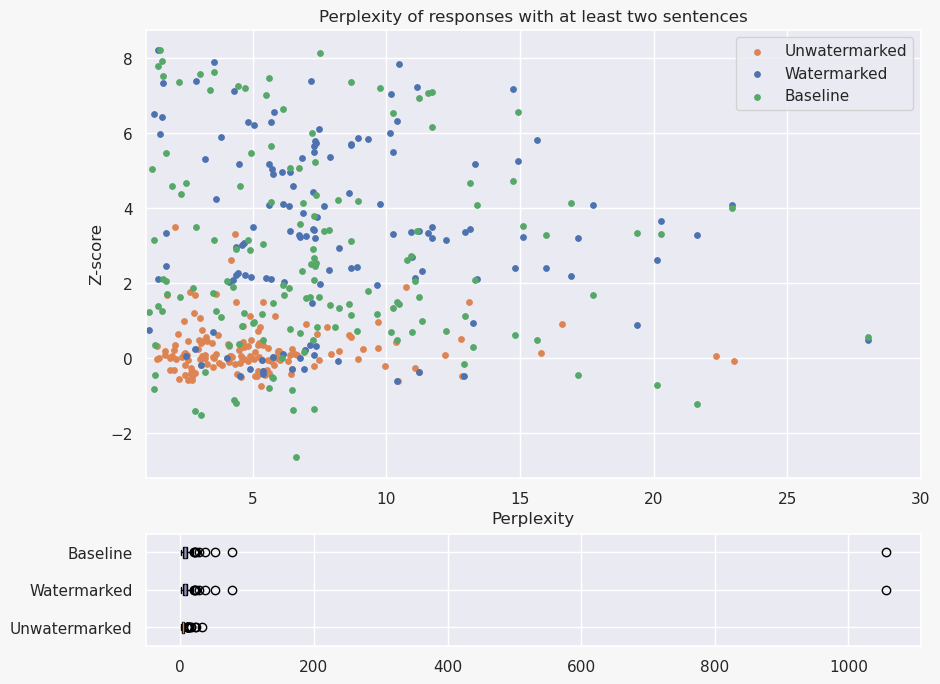

In [31]:
import csv
import ast
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import seaborn as sns

# Define the probability to z-score function
def probability_to_z(prob):
    return stats.norm.ppf(prob)

# Set a style for the plots
sns.set_theme()

point_cloud_1_y = []
point_cloud_1_x = []
point_cloud_2_y = []
point_cloud_2_x = []
point_cloud_3_y = []
point_cloud_3_x = []
# Define your own data for two point clouds
for i in range(0,len(scores)):
    if(scores2[i][0][3]>0):
        point_cloud_1_y.append(probability_to_z(1.0-scores2[i][0][0]))
        point_cloud_1_x.append(scores[i][0])
        # point_cloud_1_y = [probability_to_z(1.0-item[0][0]) for item in scores2]
        # point_cloud_1_x = [pair[0] for pair in scores]

    if(scoresX[i][1][1]>0):
        point_cloud_3_y.append(probability_to_z(1.0-ast.literal_eval(scoresX[i][1][0][1])))
        point_cloud_3_x.append(scores[i][1])

    if(scores2[i][1][3]>0):
        point_cloud_2_y.append(probability_to_z(1.0-scores2[i][1][0]))
        point_cloud_2_x.append(scores[i][1])
        # point_cloud_2_y = [probability_to_z(1.0-item[1][0]) for item in scores2]
        # point_cloud_2_x = [pair[1] for pair in scores]

    
    # point_cloud_2_y = [probability_to_z(1.0-item[1][0]) for item in scores2]
    # point_cloud_2_x = [pair[1] for pair in scores]

# Create the plot with a grid spec layout
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])

ax = fig.add_subplot(gs[0])
ax_box = fig.add_subplot(gs[1])

# Setting a light gray background color
fig.patch.set_facecolor('#f7f7f7')

# Plot point cloud 1 in blue
ax.scatter(point_cloud_1_x, point_cloud_1_y, s=15, alpha=1, c='C1', marker='o', label='Unwatermarked')

# Plot point cloud 2 in red
ax.scatter(point_cloud_2_x, point_cloud_2_y, s=15, alpha=1, c='C0', marker='o', label='Watermarked')

# Plot point cloud 3 in green
ax.scatter(point_cloud_3_x, point_cloud_3_y, s=15, alpha=1, c='C2', marker='o', label='Baseline')

# Add labels and legend
ax.set_xlabel('Perplexity', fontsize=12)
ax.set_ylabel('Z-score', fontsize=12)
ax.set_title('Perplexity of responses with at least two sentences')
ax.legend()
ax.set_xlim(1, 30)

# Box plot for each point cloud
data_to_plot = [point_cloud_1_x, point_cloud_2_x, point_cloud_3_x]
ax_box.boxplot(data_to_plot, vert=False, patch_artist=True,  labels=['Unwatermarked', 'Watermarked', 'Baseline'])
ax.set_xlim(1, 30)

plt.savefig('perplexity.png', dpi=300, bbox_inches='tight')
plt.show()